In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('df.csv')
df['timestamp'] = pd.to_datetime(df['create_time'], unit='s')
df['date'] = df['timestamp'].apply(lambda s: str(s)[:10])

In [5]:
df["in_group"] = df["pro_democrat"] + df["pro_republican"]
df["out_group"] = df["against_democrat"] + df["against_republican"]
df["republican_view"] = df["against_democrat"] + df["pro_republican"]
df["democrat_view"] = df["pro_democrat"] + df["against_republican"]

In [6]:
df['timestamp']

0        2024-04-22 23:59:08
1        2024-04-22 23:59:08
2        2024-04-22 23:58:55
3        2024-04-22 23:58:55
4        2024-04-22 23:57:44
                 ...        
545510   2024-04-28 18:00:00
545511   2024-04-24 23:08:25
545512   2024-04-24 23:07:51
545513   2024-04-24 23:05:03
545514   2024-04-24 23:00:31
Name: timestamp, Length: 545515, dtype: datetime64[ns]

In [7]:
daily_posts = df.groupby("date")[["pro_democrat","against_democrat", "pro_republican", "against_republican"]].sum()
daily_posts

,pro_democrat,against_democrat,pro_republican,against_republican
date,,,,
2024-04-05,1426.0,1225.0,1173.0,1235.0
2024-04-06,794.0,676.0,619.0,689.0
2024-04-07,791.0,773.0,717.0,630.0
2024-04-08,423.0,408.0,586.0,391.0
2024-04-09,806.0,473.0,534.0,773.0
...,...,...,...,...
2024-08-05,6456.0,3784.0,6861.0,5467.0
2024-08-06,6376.0,2541.0,3992.0,4514.0
2024-08-07,7004.0,3005.0,4650.0,5253.0


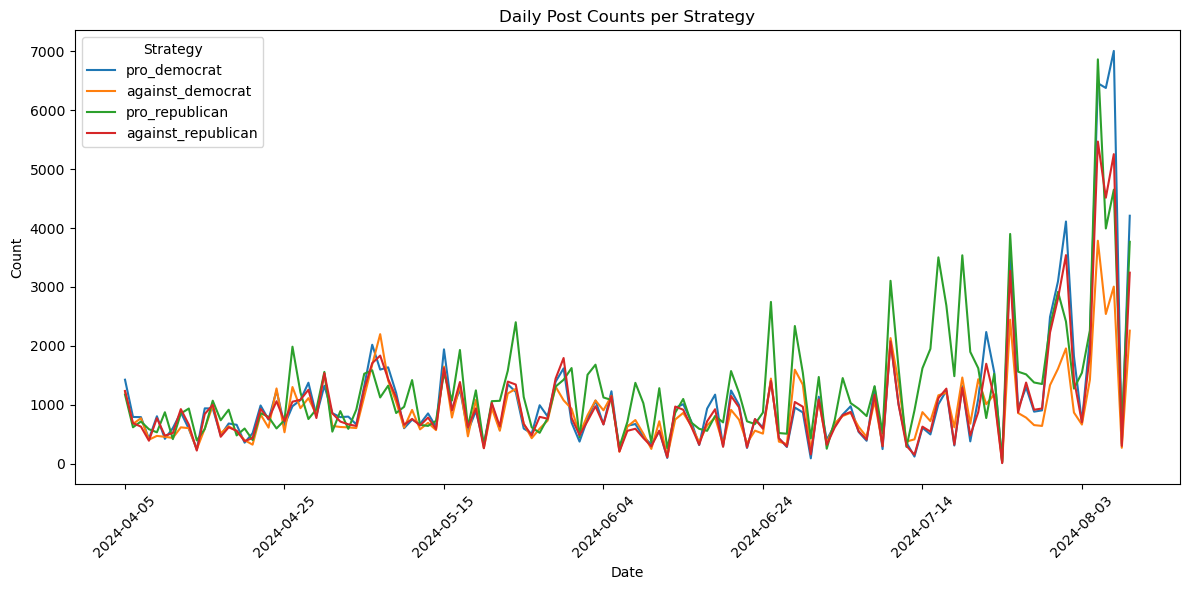

In [16]:
import matplotlib.pyplot as plt

daily_posts.plot(figsize=(12, 6))

plt.title('Daily Post Counts per Strategy')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Strategy')
plt.tight_layout()
# plt.show()
plt.savefig("strategy.png")

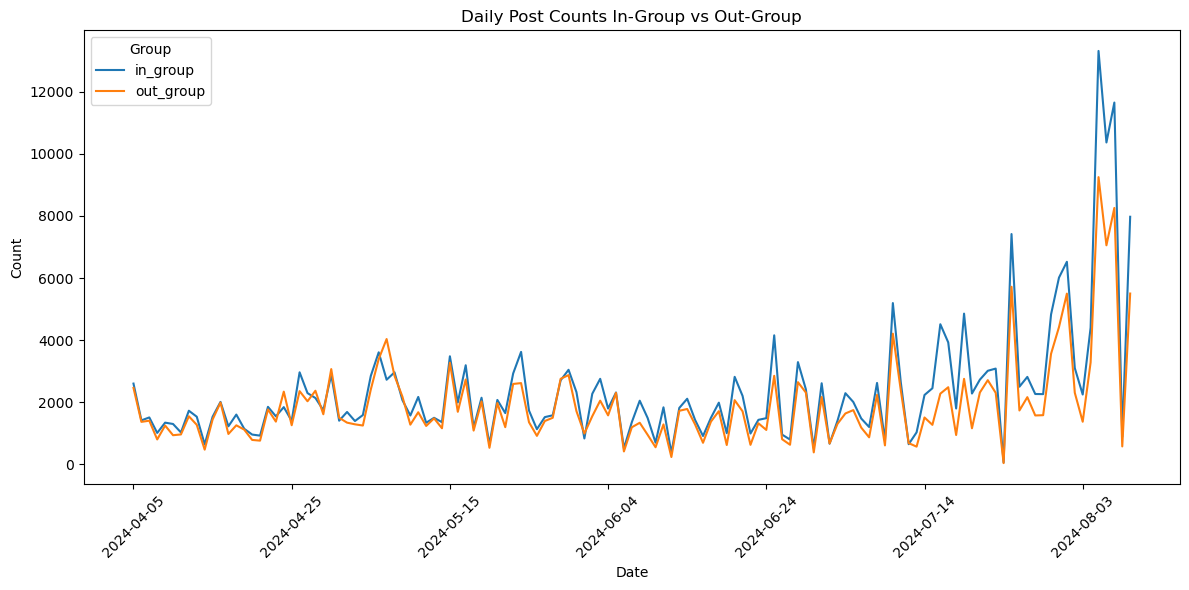

In [17]:
daily_posts_groups = df.groupby("date")[["in_group","out_group"]].sum()

daily_posts_groups.plot(figsize=(12, 6))

plt.title('Daily Post Counts In-Group vs Out-Group')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.tight_layout()
# plt.show()
plt.savefig("group.png")

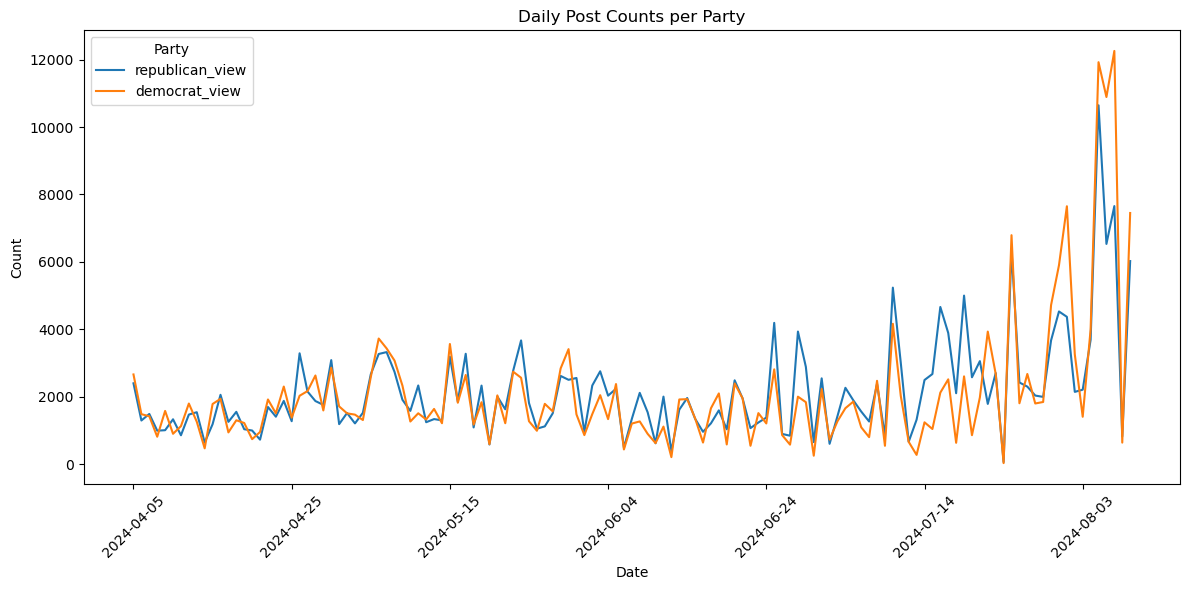

In [18]:
daily_posts_groups = df.groupby("date")[["republican_view","democrat_view"]].sum()

daily_posts_groups.plot(figsize=(12, 6))

plt.title('Daily Post Counts per Party')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Party')
plt.tight_layout()
# plt.show()
plt.savefig("party.png")

In [19]:
545515/(1712275213-1723247999)*60*60*24

-4295.399181210679

In [28]:
df.columns

Index(['Unnamed: 0.1', 'id', 'pro_democrat', 'against_democrat',
       'pro_republican', 'against_republican', 'pro_biden', 'against_biden',
       'pro_trump', 'against_trump', 'pro_kamala', 'against_kamala',
       'Unnamed: 0', 'hashtag_names', 'like_count', 'music_id',
       'video_description', 'username', 'view_count', 'comment_count',
       'create_time', 'region_code', 'share_count', 'voice_to_text',
       'effect_ids', 'playlist_id', 'tiktokurl', 'timestamp', 'date',
       'in_group', 'out_group', 'republian_view', 'democrat_view',
       'republican_view'],
      dtype='object')